In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation
import scipy as sp

In [3]:
networkModel =['bortezomib',
                # 'igvh',
                'apoptosis',
                # 'aurora',
                'bt474_long',
                'bt474_short',
                # 'cd4t',
                'colitis',
                'death',
                # 'egfr',
                # 'erbb',
                # 'fa_brca',
                # 'fa_check',
                'hcc1954_long',
                'hcc1954_short',
                'hgf',
                'mammalian',
                # 'mammalian_2006',
                'mapk',
                'oxidative',
                # 'pro_inflammatory',
                'fibroblasts',
                'skbr3_long',
                'skbr3_short',
                'tlgl_2008',
                'tlgl_2011',
                # 'tlgl_2011_reduced',
                # 'prostate',
                'migration']

In [14]:
io_dict = dict()
for Model in networkModel:
    Prefix, Suffix = 'n', 'n'
    TEMP = jR.cellcollective(Model, Prefix, Suffix, directory='../')

    BooleanRuleFileName = TEMP['BooleanRule_filename']
    network_name = TEMP['network_name']

    NumInputs = TEMP['num_inputs']
    NumInputConditions = TEMP['num_input_conditions']

    InputConditions = TEMP['input_conditions']

    OutputNodes = TEMP['output_nodes']
    InputNodes = TEMP['input_nodes']
    
    Mapping = TEMP['mapping']
    InverseMapping = TEMP['inverse_mapping']
    GRead = TEMP['Gread']
    ReadNodes = TEMP['read_nodes']
    with open('../data/' + network_name + '_IO.txt', 'r') as f:
        temp = f.readline()
        io = eval(temp)
        empty_io = [x for x in io if len(x) == 0]
        len_io = [len(x) for x in io]
        io_dict[network_name] = {'num_input_conditions': NumInputConditions,
                                'num_output_nodes': len(OutputNodes),
                                'num_empty_io': len(empty_io),
                                'sum_io': sum(len_io)}
        
cc_df = pd.DataFrame.from_dict(io_dict, orient='index')
cc_df['empty_io_ratio'] = cc_df['num_empty_io'] / cc_df['num_input_conditions']
cc_df['deterministic_io_ratio'] = cc_df['sum_io'] / (cc_df['num_input_conditions'] * cc_df['num_output_nodes'])
cc_df['network'] = 'CellCollective'

In [15]:
sfc_df = pd.read_csv('../data/random_networks_kout_canalizing_211014.csv')
sfc_df = sfc_df.drop(columns=['Unnamed: 0', 'network_idx'])
sfc_df = sfc_df.reset_index()
sfc_df['network'] = 'SF Canalizing'

In [16]:
sfk_df = pd.read_csv('../data/random_networks_kout_kauffman_211014.csv')
sfk_df = sfk_df.drop(columns=['Unnamed: 0', 'network_idx'])
sfk_df = sfk_df.reset_index()
sfk_df['network'] = 'SF Kauffman'

In [20]:
# io_df = pd.DataFrame(columns=['network', 'empty_io_ratio', 'deterministic_io_ratio'])
io_df = pd.concat([cc_df[['network', 'empty_io_ratio', 'deterministic_io_ratio']], sfc_df[['network', 'empty_io_ratio', 'deterministic_io_ratio']], sfk_df[['network', 'empty_io_ratio', 'deterministic_io_ratio']]], axis=0)

<AxesSubplot:xlabel='network', ylabel='empty_io_ratio'>

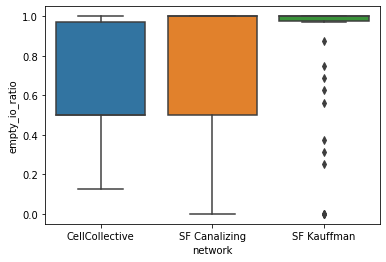

In [22]:
sns.boxplot(data=io_df, x='network', y='empty_io_ratio')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CellCollective v.s. SF Canalizing: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.820e+02
CellCollective v.s. SF Kauffman: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.126e-02 U_stat=6.025e+02


(<AxesSubplot:xlabel='network', ylabel='deterministic_io_ratio'>,
  <statannot.StatResult.StatResult at 0x7fb294eb2a00>])

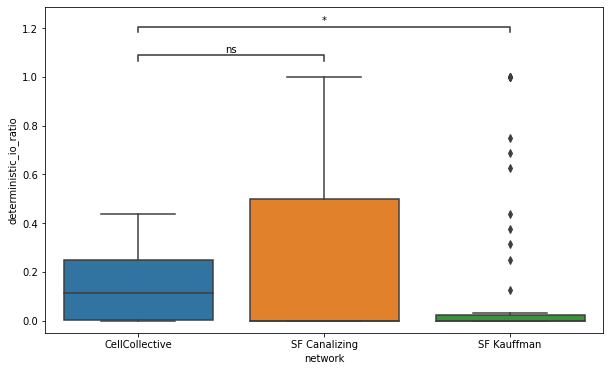

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=io_df, x='network', y='deterministic_io_ratio')
add_stat_annotation(ax=ax, data=io_df, x='network', y='deterministic_io_ratio',
                    box_pairs=[('CellCollective', 'SF Canalizing'), ('CellCollective', 'SF Kauffman')],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)